# Laboratorium 5 - Równania nieliniowe

##### Aleksandra Mazur

## Funkcje do testów

In [1]:
from mpmath import mp, plot
from matplotlib import pyplot as plt
import numpy as np

**$$f_1(x) = cos(x)cosh(x) - 1, x \in [\frac{3}{2}\pi, 2\pi]$$** 

In [2]:
def f1(x):
    return mp.cos(x) * mp.cosh(x) - 1
def d_f1(x):
    return mp.cos(x) * mp.sinh(x) - mp.sin(x) * mp.cosh(x)
domain_f1 = [1.5 * mp.pi, 2 * mp.pi]

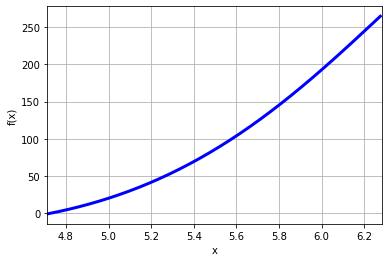

In [3]:
plot(f1, xlim = domain_f1)

**$$f_2(x) = \frac{1}{x} - tan(x), x \in [0, \frac{\pi}{2}]$$** 

In [4]:
def f2(x):
    return 1/x - mp.tan(x)
def d_f2(x):
    return -1 / x ** 2 - mp.sec(x) ** 2
domain_f2 = [1e-7, mp.pi / 2]

Przedział $[0, \frac{\pi}{2}],$ zastąpiono przedziałem $[10^{-7}, \frac{\pi}{2}],$  ponieważ 0 nie należy do dziedziny funkcji.

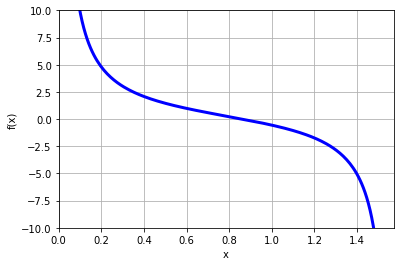

In [5]:
plot(f2, xlim = [0, mp.pi/2], ylim = [-10, 10])

**$$f_3(x) = 2^{-x} + e^x + 2cos(x), x \in [1, 3]$$** 

In [6]:
def f3(x):
    return 2 ** (-x) + mp.e ** x + 2 * mp.cos(x) - 6
def d_f3(x):
    return mp.e ** x - 2 ** (-x) * mp.log(2) - 2 * mp.sin(x)
domain_f3 = [1, 3]

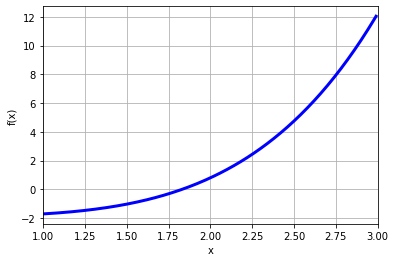

In [7]:
plot(f3, xlim = domain_f3)

## Zadanie 1 Metoda bisekcji

Metoda bisekcji, zwana też metodą równego podziału to jedna z metod rozwiązywania równań nieliniowych, polegająca na cyklicznym połowieniu zadanego z góry przedziału (w którym znajduje się pierwiastek) aż do osiągnięcia zadanej dokładności.

Opiera się ona na **twierdzeniu Bolzana-Cauchy'ego**, które brzmi następująco:

*Jeżeli funkcja ciągła f(x) ma na końcach przedziału domkniętego wartości różnych znaków, to wewnątrz tego przedziału, istnieje co najmniej jeden pierwiastek równania f(x)=0.*

Aby można było zastosować metodę bisekcji, muszą być spełnione poniższe założenia:
* funkcja f(x) jest ciągła w przedziale domkniętym [a, b]
* funkcja przyjmuje różne znaki na końcach przedziału: f(a)f(b) < 0

In [8]:
def bisection(f, domain, eps, precision):
    mp.dps = precision
    a = mp.mpf(domain[0])
    b = mp.mpf(domain[1])

    if f(a) * f(b) > 0:
        print("W podanym przedziale nie ma pierwiastka.")
        return
    
    if a > b:
        a, b = b, a
    mid = a
    i = 0
    
    while (b - a) >= eps:
        i += 1
        mid = (a + b)/2
        if f(mid) == 0:
            break
        if f(mid) * f(b) < 0:
            a = mid
        else:
            b = mid
    
    return mid, f(mid), i

In [9]:
def show_bisection_result(f, domain):
    for (eps, precision) in [(1e-7, 7), (1e-15, 15), (1e-33, 33)]:
        print("Dokładność: ", eps, "       Precyzja: ", precision)
        x_0, fx_0, i = bisection(f, domain, eps, precision)
        print("x_0 = ", x_0, " f(x_0) = ", fx_0)
        print("Liczba iteracji: ", i, "\n")

#### Dla funkcji  *$$f_1(x) = cos(x)cosh(x) - 1$$*

In [10]:
show_bisection_result(f1, domain_f1)

Dokładność:  1e-07        Precyzja:  7
x_0 =  4.730041  f(x_0) =  -9.164214e-7
Liczba iteracji:  25 

Dokładność:  1e-15        Precyzja:  15
x_0 =  4.7300407448627  f(x_0) =  3.574918139293e-14
Liczba iteracji:  51 

Dokładność:  1e-33        Precyzja:  33
x_0 =  4.73004074486270402602404810083388  f(x_0) =  -4.33334237487128066937595037081609e-33
Liczba iteracji:  111 



#### Dla funkcji  *$$f_2(x) = \frac{1}{x} - tan(x)$$*

In [11]:
show_bisection_result(f2, domain_f2)

Dokładność:  1e-07        Precyzja:  7
x_0 =  0.8603336  f(x_0) =  -7.450581e-8
Liczba iteracji:  24 

Dokładność:  1e-15        Precyzja:  15
x_0 =  0.86033358901938  f(x_0) =  -1.33226762955019e-15
Liczba iteracji:  51 

Dokładność:  1e-33        Precyzja:  33
x_0 =  0.860333589019379762483893424137663  f(x_0) =  -1.15555796663234151183358676555096e-33
Liczba iteracji:  111 



#### Dla funkcji  *$$f_3(x) = 2^{-x} + e^x + 2cos(x)$$*

In [12]:
show_bisection_result(f3, domain_f3)

Dokładność:  1e-07        Precyzja:  7
x_0 =  1.829384  f(x_0) =  -1.788139e-7
Liczba iteracji:  25 

Dokładność:  1e-15        Precyzja:  15
x_0 =  1.82938360193385  f(x_0) =  1.77635683940025e-15
Liczba iteracji:  51 

Dokładność:  1e-33        Precyzja:  33
x_0 =  1.82938360193384881713621294681415  f(x_0) =  0.0
Liczba iteracji:  111 



### Wyniki:

Liczby iteracji dla poszczególnych funkcji i bezwzględnych dokładności:

|           | $f_1$  |  $f_2$ |  $f_3$ |
|-----------|--------|--------|--------|
| $10^{-7}$ |    25  |    24  |    25  |
| $10^{-15}$|    51  |     51 |     51 |
| $10^{-33}$|    111 |    111 |    111 |

### Wnioski:
* Dla bezwzględnej dokładności $10^{-7}$ potrzeba 24/25 operacji.
* Dla bezwzględnych dokładności $10^{-15}$, $10^{-33}$ potrzeba odpowiednio 51 i 111 operacji.
* Najmniej operacji wymaga znalezienie miejsc zerowych z dokładnością $10^{-7}$.
* Liczba operacji dla każdej funkcji rośnie wraz ze zwiększaniem dokładności.
* Można przypuszczać, że liczba operacji nie zależy od funkcji, a jedynie od dokładności wyniku.
* Faktyczne miejsce zerowe (f(x) = 0) udało się osiągnąć tylko w jednym przypadku - dla funkcji $f_3$ i dokładności $10^{-33}$.
* Metoda ta pozwala na wyznaczenie miejsca zerowego funkcji w umiarkowanym czasie.

### W jaki sposób możemy obliczyć k pierwszych dodatnich pierwiastków funkcji $f_1(x)$?

Powyższy problem można rozwiązać powtarzając k razy poniższe kroki:
* wybrać pewne nieduże *s*, które będzie końcem przedziału (w pierwszym kroku: [0, s], x_0 = 0, x_1 = s)
* zwiększać wartość s, dopóki nie będzie spełniony warunek, że iloczyn wartości funkcji na krańcach przedziału jest mniejszy od 0, tzn. **f(x_0)f(x_1) < 0** (co jest jednoznaczne z istnieniem pierwiastka w danym przedziale)
* używając metody bisekcji znaleźć pierwiastek w zadanym przedziale
* jako początek nowego przedziału ustalić koniec poprzedniego

Powodzenie tej metody będzie zależało od właściwego dobrania wartości s. Jeżeli wartość ta będzie za mała, to program będzie wolno działał, a jeżeli będzie za duża - niektóre pierwiastki mogą zostać pominięte.

## Zadanie 2 Metoda Newtona

Metoda Newtona jest również znana metodą Newtona-Raphsona lub metodą stycznych. Pozwala ona obliczyć miejsca zerowe funkcji nieliniowych w przedziałach.

Funkcja ta jednak musi spełniać następujące warunki:
* funkcja f oraz jej pierwsza i druga pochodna są ciągłe w badanym przedziale [a,b]
* wewnątrz przedziału [a,b] znajduje się dokładnie jeden pierwiastek
* f(a) * f(b) < 0
* pierwsza i druga pochodna mają stały znak w badanym przedziale [a,b]

Zaczynając od punktu startowego (wybranego przeze mnie) $$x = \frac{a+b}{2}$$ metoda Newtona wykorzystuje poniższą formułę do znalezienia następnej wartości: $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [13]:
def newton(f, df, domain, eps, precision, iterations):
    mp.dps = precision
    i = 0
    x = mp.mpf((mp.mpf(domain[1]) + mp.mpf(domain[0])) / 2)
    h = f(x) / df(x)
    
    while abs (h) >= eps and i < iterations:
        i += 1
        h = f(x) / df(x)
        x = x - h

    return x, f(x), i

In [14]:
def show_newton_result(f, df, domain):
    for (eps, precision) in [(1e-7, 7), (1e-15, 15), (1e-33, 33)]:
        print("Dokładność: ", eps, "       Precyzja: ", precision)
        x_0, fx_0, i = newton(f, df, domain, eps, precision, 1000)
        print("x_0 = ", x_0, " f(x_0) = ", fx_0)
        print("Liczba iteracji: ", i, "\n")

#### Dla funkcji  *$$f_1(x) = cos(x)cosh(x) - 1$$*

In [15]:
show_newton_result(f1, d_f1, domain_f1)

Dokładność:  1e-07        Precyzja:  7
x_0 =  4.730041  f(x_0) =  -9.164214e-7
Liczba iteracji:  6 

Dokładność:  1e-15        Precyzja:  15
x_0 =  4.7300407448627  f(x_0) =  -1.53210777398272e-14
Liczba iteracji:  7 

Dokładność:  1e-33        Precyzja:  33
x_0 =  4.73004074486270402602404810083388  f(x_0) =  -4.33334237487128066937595037081609e-33
Liczba iteracji:  8 



#### Dla funkcji  *$$f_2(x) = \frac{1}{x} - tan(x)$$*

In [16]:
show_newton_result(f2, d_f2, domain_f2)

Dokładność:  1e-07        Precyzja:  7
x_0 =  0.8603336  f(x_0) =  0.0
Liczba iteracji:  3 

Dokładność:  1e-15        Precyzja:  15
x_0 =  0.86033358901938  f(x_0) =  0.0
Liczba iteracji:  5 

Dokładność:  1e-33        Precyzja:  33
x_0 =  0.860333589019379762483893424137662  f(x_0) =  1.92592994438723585305597794258493e-34
Liczba iteracji:  6 



#### Dla funkcji  *$$f_3(x) = 2^{-x} + e^x + 2cos(x)$$*

In [17]:
show_newton_result(f3, d_f3, domain_f3)

Dokładność:  1e-07        Precyzja:  7
x_0 =  1.829384  f(x_0) =  0.0
Liczba iteracji:  5 

Dokładność:  1e-15        Precyzja:  15
x_0 =  1.82938360193385  f(x_0) =  0.0
Liczba iteracji:  6 

Dokładność:  1e-33        Precyzja:  33
x_0 =  1.82938360193384881713621294681415  f(x_0) =  0.0
Liczba iteracji:  7 



### Wyniki:

Liczby iteracji dla poszczególnych funkcji i bezwzględnych dokładności:

Metoda Newtona:

|           | $f_1$  |  $f_2$ |  $f_3$ |
|-----------|--------|--------|--------|
| $10^{-7}$ |    6   |    3   |    5   |
| $10^{-15}$|    7   |     5  |     6  |
| $10^{-33}$|    8   |    6   |    7   |

### Wnioski:
* Najmniej operacji wymaga znalezienie miejsc zerowych z dokładnością $10^{-7}$.
* Liczba operacji dla każdej funkcji rośnie wraz ze zwiększaniem dokładności.
* Funkcja $f_2$ w porównaniu z pozostałymi wymaga najmniejszej liczby operacji dla każdej dokładności, a funkcja $f_1$ - największej.
* Faktyczne miejsce zerowe (f(x) = 0) udało się osiągnąć w 5 przypadkach: dla funkcji $f_2$ o dokładnościach $10^{-7}$, $10^{-15}$ oraz dla funkcji $f_3$ w każdym przypadku.
* Metoda ta pozwala na wyznaczenie miejsca zerowego w szybkim czasie.

### Porównanie dotychczasowych metod:

Metoda bisekcji:

|           | $f_1$  |  $f_2$ |  $f_3$ |
|-----------|--------|--------|--------|
| $10^{-7}$ |    25  |    24  |    25  |
| $10^{-15}$|    51  |     51 |     51 |
| $10^{-33}$|    111 |    111 |    111 |

Metoda Newtona:

|           | $f_1$  |  $f_2$ |  $f_3$ |
|-----------|--------|--------|--------|
| $10^{-7}$ |    6   |    3   |    5   |
| $10^{-15}$|    7   |     5  |     6  |
| $10^{-33}$|    8   |    6   |    7   |


* Metoda Newtona w każdym przypadku wymaga znacznie mniejszej liczby iteracji niż metoda bisekcji.
* Metoda Newtona wymaga znajomości pochodnej funkcji w przeciwieństwie do metody bisekcji.
* Metoda Newtona osiąga różne wartości operacji dla danej dokładności w zależności od funkcji, podczas gdy w metodzie bisekcji liczby operacji dla danej dokładności są niemal identyczne (oprócz jednej dokładności = $10^{-7}$).

## Zadanie 3 Metoda siecznych

Metoda ta służy do tego samego celu, co poprzednie. Polega na przyjęciu, że dana funkcja ciągła na dostatecznie małym odcinku w przybliżeniu zmienia się w sposób liniowy. Można wtedy na odcinku [a, b] krzywą y = f(x) zastąpić sieczną. Za przybliżoną wartość pierwiastka przyjmuje się punkt przecięcia siecznej z osią OX.

Aby skorzystać z metody siecznych funkcja musi spełniać następujące warunki:
* funkcja f oraz jej pierwsza i druga pochodna są ciągłe w badanym przedziale [a, b]
* wewnątrz przedziału [a, b] znajduje się dokładnie jeden pierwiastek
* pierwsza i druga pochodna mają stały znak w badanym przedziale [a, b]

Metodę siecznych dla funkcji **f(x)**, mającej pierwiastek w przedziale **[a, b]** można zapisać następującym wzorem rekurencyjnym:
$$\begin{cases}
x_0 = a\\
x_1 = b\\
x_{n+1} = \frac{f(x_n) * x_{n-1} - f(x_{n-1}) * x_n} {f(x_n) - f(x_{n-1})} \end{cases}$$

In [18]:
def secant(f, domain, eps, precision, iterations):
    mp.dps = precision
    x_0 = mp.mpf(domain[0])
    x_1 = mp.mpf(domain[1])
    i = 0
    
    while abs(x_1 - x_0) > eps and i < iterations:
        i += 1
        x_2 = (x_0 * f(x_1) - x_1 * f(x_0)) / (f(x_1) - f(x_0))
        x_0, x_1 = x_1, x_2
        
    return x_1, f(x_1), i

In [19]:
def show_secant_result(f, domain):
    for (eps, precision) in [(1e-7, 7), (1e-15, 15), (1e-33, 33)]:
        print("Dokładność: ", eps, "       Precyzja: ", precision)
        x_0, fx_0, i = secant(f, domain, eps, precision, 1000)
        print("x_0 = ", x_0, " f(x_0) = ", fx_0)
        print("Liczba iteracji: ", i, "\n")

#### Dla funkcji  *$$f_1(x) = cos(x)cosh(x) - 1$$*

In [20]:
show_secant_result(f1, domain_f1)

Dokładność:  1e-07        Precyzja:  7
x_0 =  4.730041  f(x_0) =  -9.164214e-7
Liczba iteracji:  6 

Dokładność:  1e-15        Precyzja:  15
x_0 =  4.7300407448627  f(x_0) =  -1.53210777398272e-14
Liczba iteracji:  7 

Dokładność:  1e-33        Precyzja:  33
x_0 =  4.73004074486270402602404810083388  f(x_0) =  -4.33334237487128066937595037081609e-33
Liczba iteracji:  9 



#### Dla funkcji  *$$f_2(x) = \frac{1}{x} - tan(x)$$*

In [21]:
show_secant_result(f2, domain_f2)

Dokładność:  1e-07        Precyzja:  7
x_0 =  0.8603336  f(x_0) =  0.0
Liczba iteracji:  15 

Dokładność:  1e-15        Precyzja:  15
x_0 =  0.86033358901938  f(x_0) =  0.0
Liczba iteracji:  41 

Dokładność:  1e-33        Precyzja:  33
x_0 =  0.860333589019379762483893424137662  f(x_0) =  -1.92592994438723585305597794258493e-34
Liczba iteracji:  43 



#### Dla funkcji  *$$f_3(x) = 2^{-x} + e^x + 2cos(x)$$*

In [22]:
show_secant_result(f3, domain_f3)

Dokładność:  1e-07        Precyzja:  7
x_0 =  1.829384  f(x_0) =  -5.960464e-8
Liczba iteracji:  10 

Dokładność:  1e-15        Precyzja:  15
x_0 =  1.82938360193385  f(x_0) =  0.0
Liczba iteracji:  11 

Dokładność:  1e-33        Precyzja:  33
x_0 =  1.82938360193384881713621294681415  f(x_0) =  0.0
Liczba iteracji:  13 



### Wyniki:

Liczby iteracji dla poszczególnych funkcji i bezwzględnych dokładności:

Metoda siecznych:

|   Dokładność       | $f_1$  |  $f_2$ |  $f_3$ |
|-----------|--------|--------|--------|
| $10^{-7}$ |    6   |    15  |   10   |
| $10^{-15}$|    7   |    41  |   11   |
| $10^{-33}$|    9   |    43  |   13   |

### Wnioski:
* Najmniej operacji wymaga znalezienie miejsc zerowych z dokładnością $10^{-7}$.
* Liczba operacji dla każdej funkcji rośnie wraz ze zwiększaniem dokładności.
* Funkcja $f_2$ w porównaniu z pozostałymi wymaga największej liczby operacji dla każdej dokładności, a funkcja $f_1$ - najmniejszej (w przeciwieństwie do metody Newtona).
* Faktyczne miejsce zerowe (f(x) = 0) udało się osiągnąć w 4 przypadkach: dla funkcji $f_2$ o dokładnościach $10^{-7}$, $10^{-15}$ oraz dla funkcji $f_3$ i dokładnościach $10^{-15}$, $10^{-33}$.
* Metoda ta pozwala na wyznaczenie miejsca zerowego funkcji w zadowalającym czasie.

## Podsumowanie wszystkich metod:

Dokładność $10^{-7}$:

|    Metoda | $f_1$  |  $f_2$ |  $f_3$ |
|-----------|--------|--------|--------|
| bisekcji  |    25  |    24  |    25  |
| Newtona   |    6   |     3  |     5  |
| siecznych |    6   |    15  |    10  |

Dokładność $10^{-15}$:

|    Metoda | $f_1$  |  $f_2$ |  $f_3$ |
|-----------|--------|--------|--------|
| bisekcji  |    51  |     51 |     51 |
| Newtona   |    7   |     5  |     6  |
| siecznych |    7   |    41  |   11   |

Dokładność $10^{-33}$:

|    Metoda | $f_1$  |  $f_2$ |  $f_3$ |
|-----------|--------|--------|--------|
| bisekcji  |    111 |    111 |    111 |
| Newtona   |    8   |    6   |    7   |
| siecznych |    9   |    43  |   13   |

## Wnioski:
* Metoda bisekcji jest najprostsza do zrozumienia oraz napisania.
* Najszybciej zbieżna jest metoda Newtona, a najwolniej - metoda bisekcji.
* Metoda Newtona w przeciwieństwie do innych, wymaga znajomości pochodnej funkcji.
* Wadą metody Newtona jest fakt, że zbieżność nie musi zawsze zachodzić. W wielu przypadkach metoda bywa rozbieżna, kiedy punkt startowy jest zbyt daleko od szukanego pierwiastka.
* Metoda siecznych ma tę zaletę, że do wykonania interpolacji za jej pomocą niepotrzebna jest znajomość pochodnej funkcji, jednak metoda ta nie zawsze jest zbieżna.
* Dla zbieżności metody bisekcji wystarcza jedynie ciągłość funkcji, a długości badanych przedziałów mogą być bardzo duże.
* Wszystkie powyższe metody są przydatne przy szukaniu miejsca zerowego w zadanym przedziale. Najlepiej korzystać z metody Newtona lub siecznych, a gdy te zawiodą należy użyć metody bisekcji.